# Big Data Analytics - Project - 2021

### Authors: Kirill Holtmann, Lilith Feer, Luca ??, Mark ??, Remo ??
### Matrikel-Nr.: 16722423, 16720799, ??, ???, ???

## Goal

### Goal Description

# 

## Packages & Libraries

In [127]:
#install.packages("BiocManager")
#BiocManager::install("Rgraphviz")

#install.packages("data.table")
#install.packages("dplyr")
#BiocManager::install("outliers")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.15), R 4.0.4 (2021-02-15)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'outliers'"
Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.0.4/library
  packages:
    boot, class, cluster, KernSmooth, lattice, MASS, Matrix, mgcv, nnet,
    spatial, survival

Old packages: 'colorspace', 'curl', 'dplyr', 'ellipsis', 'haven', 'installr',
  'openssl', 'processx', 'raster', 'rlang', 'rmarkdown', 'statmod', 'stringi',
  'tibble', 'tidyselect', 'vctrs', 'viridis', 'xfun'



In [3]:
library(ggplot2)
library(data.table)
library("dplyr") 
library(tidyr)
library(Hmisc)
library(corrplot)
#library(outliers)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.87 loaded



## Dataset
### Description:
#### Pancreatic cancer arises from the abnormal and uncontrolled growth of cells in the tissues of the pancreas. Pancreatic adenocarcinoma (PAAD) is the most common type of pancreatic cancer, accounting for approximately 85% of all types of pancreatic cancer. This cancer is the twelfth most common cancer and the seventh leading cause of cancer-related death. [01]

#### The dataset contains normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 185 pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.

### Link:
### https://www.kaggle.com/abhiparashar/cancer-prediction?select=PAAD.gct

### Load:

In [4]:
# 1 -  Read gct:
# original_dataset <- read.gct("Data/PAAD.gct")

# 2 - Read in data.table format:                    # Setting Participant ID as column Name -> skip = 3
original_dataset <- fread("Data/PAAD.gct", skip = 3, quote = "", header = TRUE, sep = "\t")

In [56]:
# Dimensions of the dataset
dimensions <- dim(original_dataset)
message("The dimensions of the dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])

# Overview of types of Data
#str(original_dataset)

# Patients IDs
patients_IDs <- colnames(original_dataset)

# Features
rownames <- original_dataset[,1]

# Attributes
#attributes(original_dataset)

head(original_dataset,55)

The dimensions of the dataset are: Rows = 18588 and Columns = 184



participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,⋯,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d.1,a8sy,a8lh,aapl
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,⋯,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,⋯,2,5,3,4,5,,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,⋯,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,⋯,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec
vital_status,dead,alive,dead,alive,dead,dead,alive,dead,alive,⋯,alive,dead,alive,alive,alive,alive,alive,alive,alive,alive
days_to_death,66,NA,293,NA,627,607,NA,691,NA,⋯,NA,366,NA,NA,NA,NA,NA,NA,NA,NA
days_to_last_followup,NA,729,NA,80,NA,NA,676,NA,1287,⋯,395,NA,498,951,720,350,350,388,2016,467
additional_studies,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
adenocarcinoma_invasion,yes,yes,yes,yes,yes,yes,yes,yes,yes,⋯,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


### Separate the two data sets (meta data and expression data)

In [6]:
Expression_data <- original_dataset[124:length(original_dataset$participant_id),]
Patient_data <- original_dataset[1:123,]

### Transpose the data sets

In [7]:
transposefunction <- function(dataset){
    rowname <- dataset$participant_id
    colname <- 1:length(original_dataset[1,])
    transposed_dataset <- transpose(dataset)
    rownames(transposed_dataset) <- colname
    colnames(transposed_dataset) <- rowname
    transposed_dataset <- transposed_dataset[2:nrow(transposed_dataset),]
    return(transposed_dataset)
}

t_expression_data <- transposefunction(Expression_data)
t_patient_data <- transposefunction(Patient_data)

dimensions <- dim(t_expression_data)
message("The dimensions of the Expression dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])
dimensions <- dim(t_patient_data)
message("The dimensions of the Patient dataset are: ","Rows = ",dimensions[1] ," and Columns = ",dimensions[2])

The dimensions of the Expression dataset are: Rows = 183 and Columns = 18465

The dimensions of the Patient dataset are: Rows = 183 and Columns = 123



In [6]:
# convert the whole data set into floats
t_expression_data[] <- lapply(t_expression_data, function(x) {as.numeric(as.character(x))})

dimensions <- dim(t_expression_data)
dimensions[1]*dimensions[2]

table(is.na(t_expression_data))

summary(is.na(t_expression_data[1:5,1:5]))
## there are 134'954 missing values (from 3'379'095 total) in the expression data set

[1] 3379095


  FALSE    TRUE 
3244141  134954 

  SLC35E2           A1BG            A1CF           A2BP1        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:5         FALSE:5         FALSE:5         FALSE:3        
                                                 TRUE :2        
   A2LD1        
 Mode :logical  
 FALSE:5        
                

In [8]:
table(is.na(t_patient_data))

dimensions <- dim(t_patient_data)
dimensions[1]*dimensions[2]

summary(is.na(t_patient_data[1:5,1:5]))
## 9654 of 22632 are missing values --> but some have a meaning (e.g. when patients haven't died days_to_death is NA)


FALSE  TRUE 
12855  9654 

[1] 22509

 sample_type     mRNAseq_cluster bcr_patient_barcode bcr_patient_uuid
 Mode :logical   Mode :logical   Mode :logical       Mode :logical   
 FALSE:5         FALSE:5         FALSE:5             FALSE:5         
 vital_status   
 Mode :logical  
 FALSE:5        

In [17]:
head(t_patient_data,10)

sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,age_at_initial_pathologic_diagnosis,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
Primary solid Tumor,1,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66,NA,NA,yes,65,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1962
Primary solid Tumor,2,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NA,729,NA,yes,48,...,5,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293,NA,NA,yes,75,...,NA,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,1,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NA,80,NA,yes,71,...,NA,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,4,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627,NA,NA,yes,70,...,1,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aaba,e3a19e63-bae5-498b-9687-41194aa5728d,dead,607,NA,NA,yes,55,...,5,NA,NA,pancreas,primary,false,2016,2014,2012,NA
Primary solid Tumor,3,tcga-2j-aabe,58c1c391-5ea3-4432-bb1e-e7e1974954bc,alive,NA,676,NA,yes,73,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1960
Primary solid Tumor,2,tcga-2j-aabf,886d6116-d496-444f-9b7b-7449dad31055,dead,691,NA,NA,yes,73,...,3,NA,NA,pancreas,primary,false,2016,2014,2012,1960
Primary solid Tumor,2,tcga-2j-aabh,c53328b4-0930-4e6a-a648-283b5565295e,alive,NA,1287,NA,yes,61,...,1,NA,NA,pancreas,primary,false,2016,2014,2011,NA
Primary solid Tumor,3,tcga-2j-aabi,2aaf212f-000a-4a9d-8a4a-198fa94f491e,alive,NA,969,NA,yes,55,...,4,NA,NA,pancreas,primary,false,2016,2014,2011,1973


In [8]:
# turn the whole dataset into floats
head(t_expression_data,10)

SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.45,6.4,4.7,-1.0,7.5,6.4,14.3,10.6,8.8,1.0,⋯,8.6,6.2,9.0,9.9,NaN,9.2,12.9,10.1,9.3,5.5
8.10,5.8,5.7,1.1,6.8,NaN,14.0,10.2,5.6,-1.2,⋯,8.8,5.8,8.5,10.0,NaN,9.3,12.4,9.8,8.9,4.5
7.20,6.4,3.0,NaN,7.3,10.8,13.1,10.1,0.2,0.2,⋯,9.1,3.9,8.1,10.0,-0.8,9.4,13.5,9.8,9.2,4.7
8.00,5.8,5.1,NaN,7.5,4.1,13.8,8.6,3.2,-0.1,⋯,8.9,5.2,8.5,9.7,1.9,9.4,12.5,9.7,9.3,6.4
7.65,6.7,4.4,0.1,7.4,9.3,14.6,10.1,5.7,NaN,⋯,8.4,5.9,8.6,9.9,0.1,9.3,13.0,10.1,9.2,4.9
8.10,6.6,4.2,NaN,6.6,9.8,13.3,9.3,2.6,4.2,⋯,7.5,5.7,8.2,10.6,0.3,9.9,12.2,10.4,9.6,5.0
8.20,6.3,1.6,NaN,7.1,6.2,13.4,9.5,5.1,NaN,⋯,7.9,5.8,8.8,10.1,-0.7,9.1,12.9,9.7,8.9,5.6
8.20,6.5,6.8,1.7,6.8,3.8,14.2,8.4,6.9,2.5,⋯,9.0,5.8,8.7,9.9,0.1,9.5,12.6,10.6,9.8,5.1
7.55,5.7,6.0,0.4,8.0,2.3,13.9,8.4,4.3,1.4,⋯,8.6,6.4,9.4,9.8,-1.2,8.9,12.7,10.0,8.8,4.6


### Gene expression EDA 

To check the gene expression data for obvious data error, we plot the histograms for the minima and maximas for each gene. From these plots we see that the expression values are within biologically reasonable ranges.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



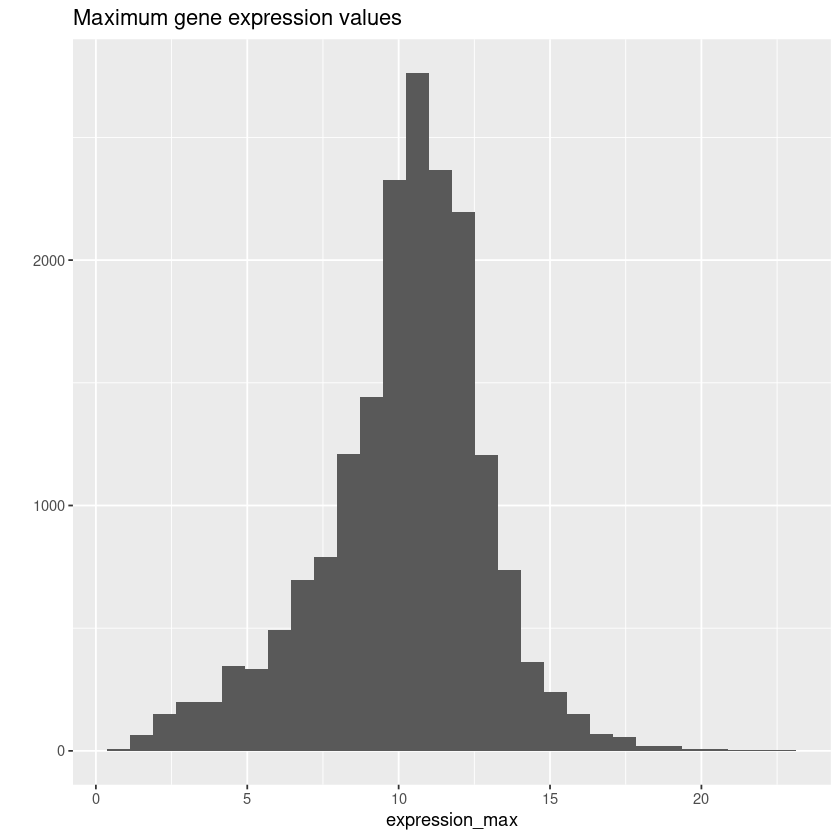

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



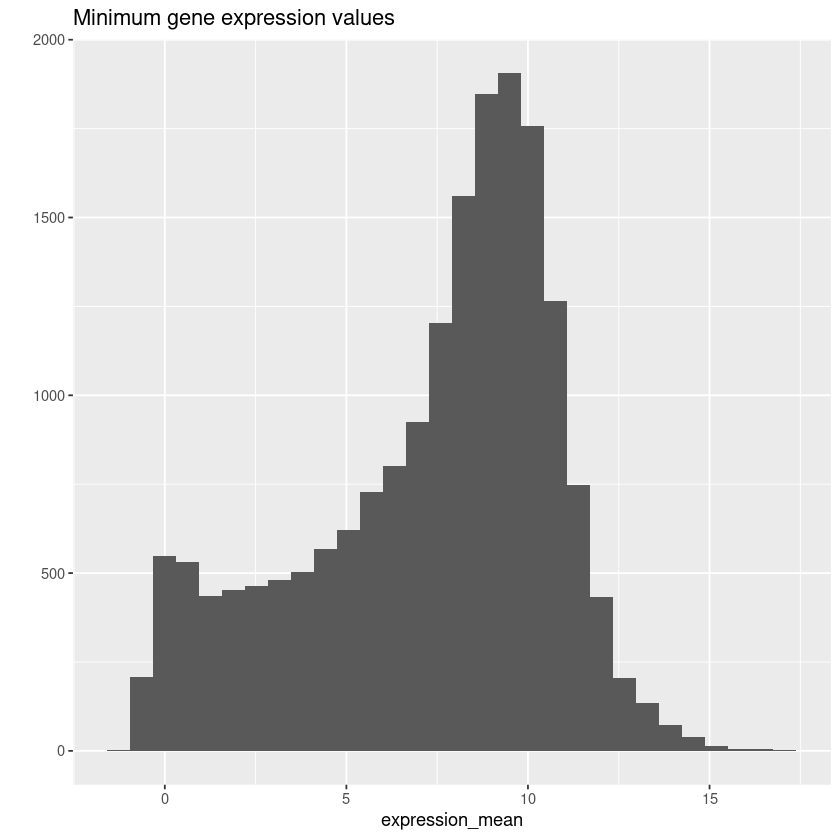

[1] 4.284739


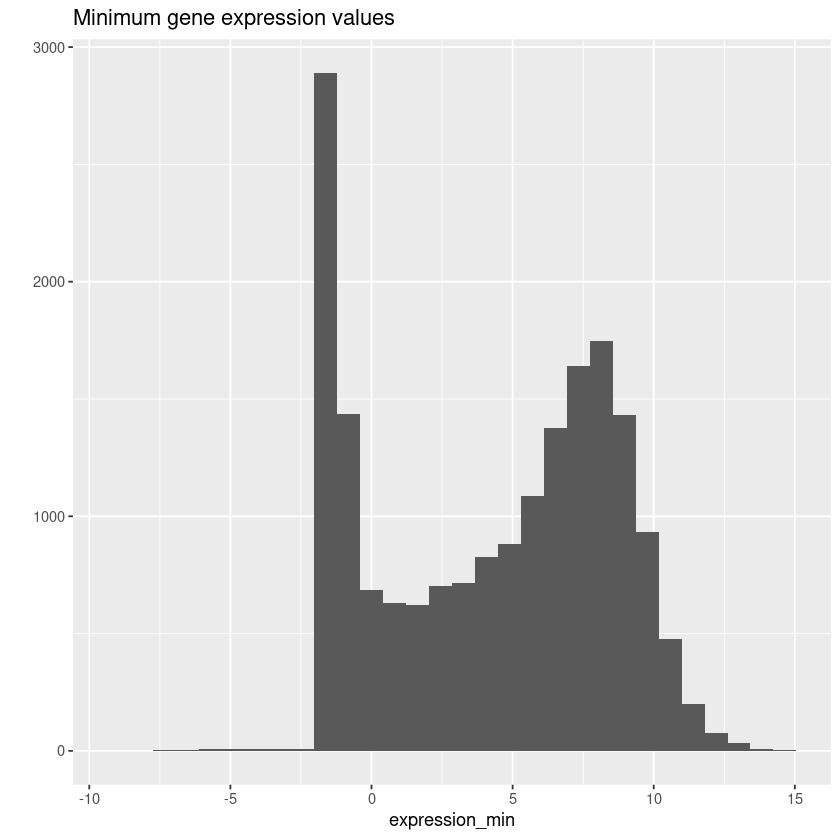

In [25]:
expression_max <- sapply(t_expression_data, max, na.rm=T)
qplot(expression_max, main="Maximum gene expression values")

expression_mean <- sapply(t_expression_data, mean, na.rm=T)
qplot(expression_mean, main="Mean gene expression values")

expression_min <- sapply(t_expression_data, min, na.rm=T)
qplot(expression_min, main="Minimum gene expression values")

print(mean(expression_min))

### Grubbs Test: Check for outliers by Histograms visualization.

In [ ]:
outlier_fun <- function(df){
  for (columnindex in 1:ncol(df)){
      hist(data.matrix(df[,..columnindex]))
      print(grubbs.test(data.matrix(df[,..columnindex])))
  }
}

outlier_fun(t_expression_data)
# if the p-value is less than the chosen significance threshold (generally α = 0.05) then the 
# null hypothesis is rejected and we will conclude that the lowest/highest value is an outlier.

# All the outliers seem to be in a plausible range (look at histogram) --> we leave
# them in the data set

#### From the histograms above we can see that ...


## 
## Patient meta data histograms 

### Numeric columns

We investigate and clean up the numeric data part of the patient data

In [65]:
t_patient_data <- t_patient_data %>%
    mutate_all(type.convert) %>%
    mutate_if(is.factor, as.character)

# only numeric values
df_patient_num <-  t_patient_data %>% select_if(is.numeric)

sprintf("Initially: %d numeric columns",ncol(df_patient_num))

# columns without any variance
which(apply(df_patient_num,2,sd)==0)

# remove dcc columns because they are all the same and refer to the upload of the dataset?

df_patient_num <- df_patient_num %>% select(-day_of_dcc_upload, -month_of_dcc_upload, -year_of_dcc_upload)


# days_to_index,days_to_initial_pathologic_diagnosis, number_of_lymphnodes_positive_by_ihc  is 0 or NA
df_patient_num <- df_patient_num %>% select(-days_to_index, -days_to_initial_pathologic_diagnosis, -number_of_lymphnodes_positive_by_ihc)


#system_version is 6 or 7, for our analysis not relevant
df_patient_num <- df_patient_num %>% select(-system_version)

sprintf("Final: %d numeric columns",ncol(df_patient_num))

[1] "Initially: 28 numeric columns"

day_of_dcc_upload month_of_dcc_upload  year_of_dcc_upload 
                  6                  17                  25

[1] "Final: 21 numeric columns"

In [76]:
#df_patient_num$system_version

In [77]:
head(df_patient_num)

mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_pancreatitis_onset,frequency_of_alcohol_consumption,⋯,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,66,NA,65,1,5,-23962,NA,NA,3,⋯,22,4.5,7,7,25,1988,3,2014,2012,1962
2,NA,729,48,NA,16,-17794,NA,-292,NA,⋯,34,6.8,7,0,NA,NA,5,2014,2012,NA
3,293,NA,75,NA,5,-27600,NA,NA,NA,⋯,18,5.0,7,0,NA,NA,NA,2014,2012,NA
1,NA,80,71,NA,16,-26028,NA,NA,NA,⋯,27,3.5,7,3,NA,NA,NA,2014,2012,NA
4,627,NA,70,1,5,-25920,NA,NA,3,⋯,37,4.0,8,6,NA,NA,1,2014,2012,NA
3,607,NA,55,NA,16,-20133,NA,-18029,NA,⋯,22,4.3,7,2,51,NA,5,2014,2012,NA


Warning message:
“Removed 680 rows containing non-finite values (stat_bin).”


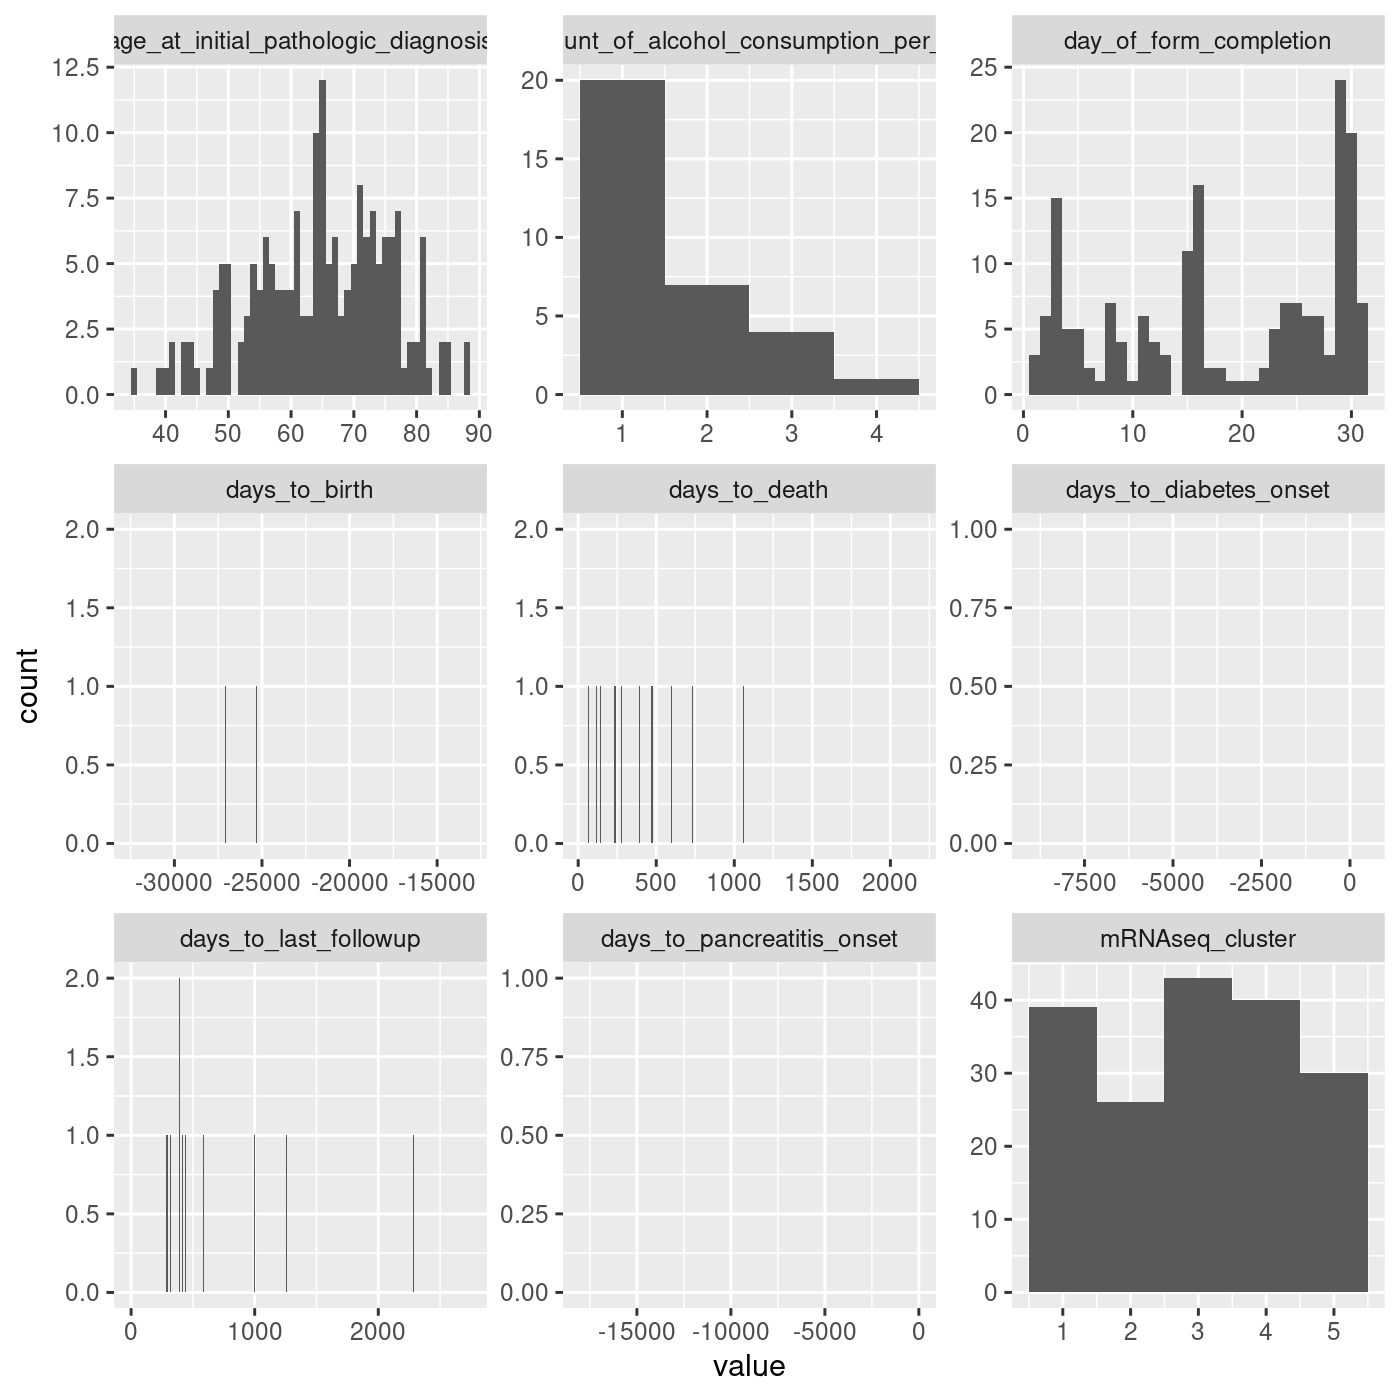

In [59]:
ggplot(gather(df_patient_num[,1:9], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

Warning message:
“Removed 462 rows containing non-finite values (stat_bin).”


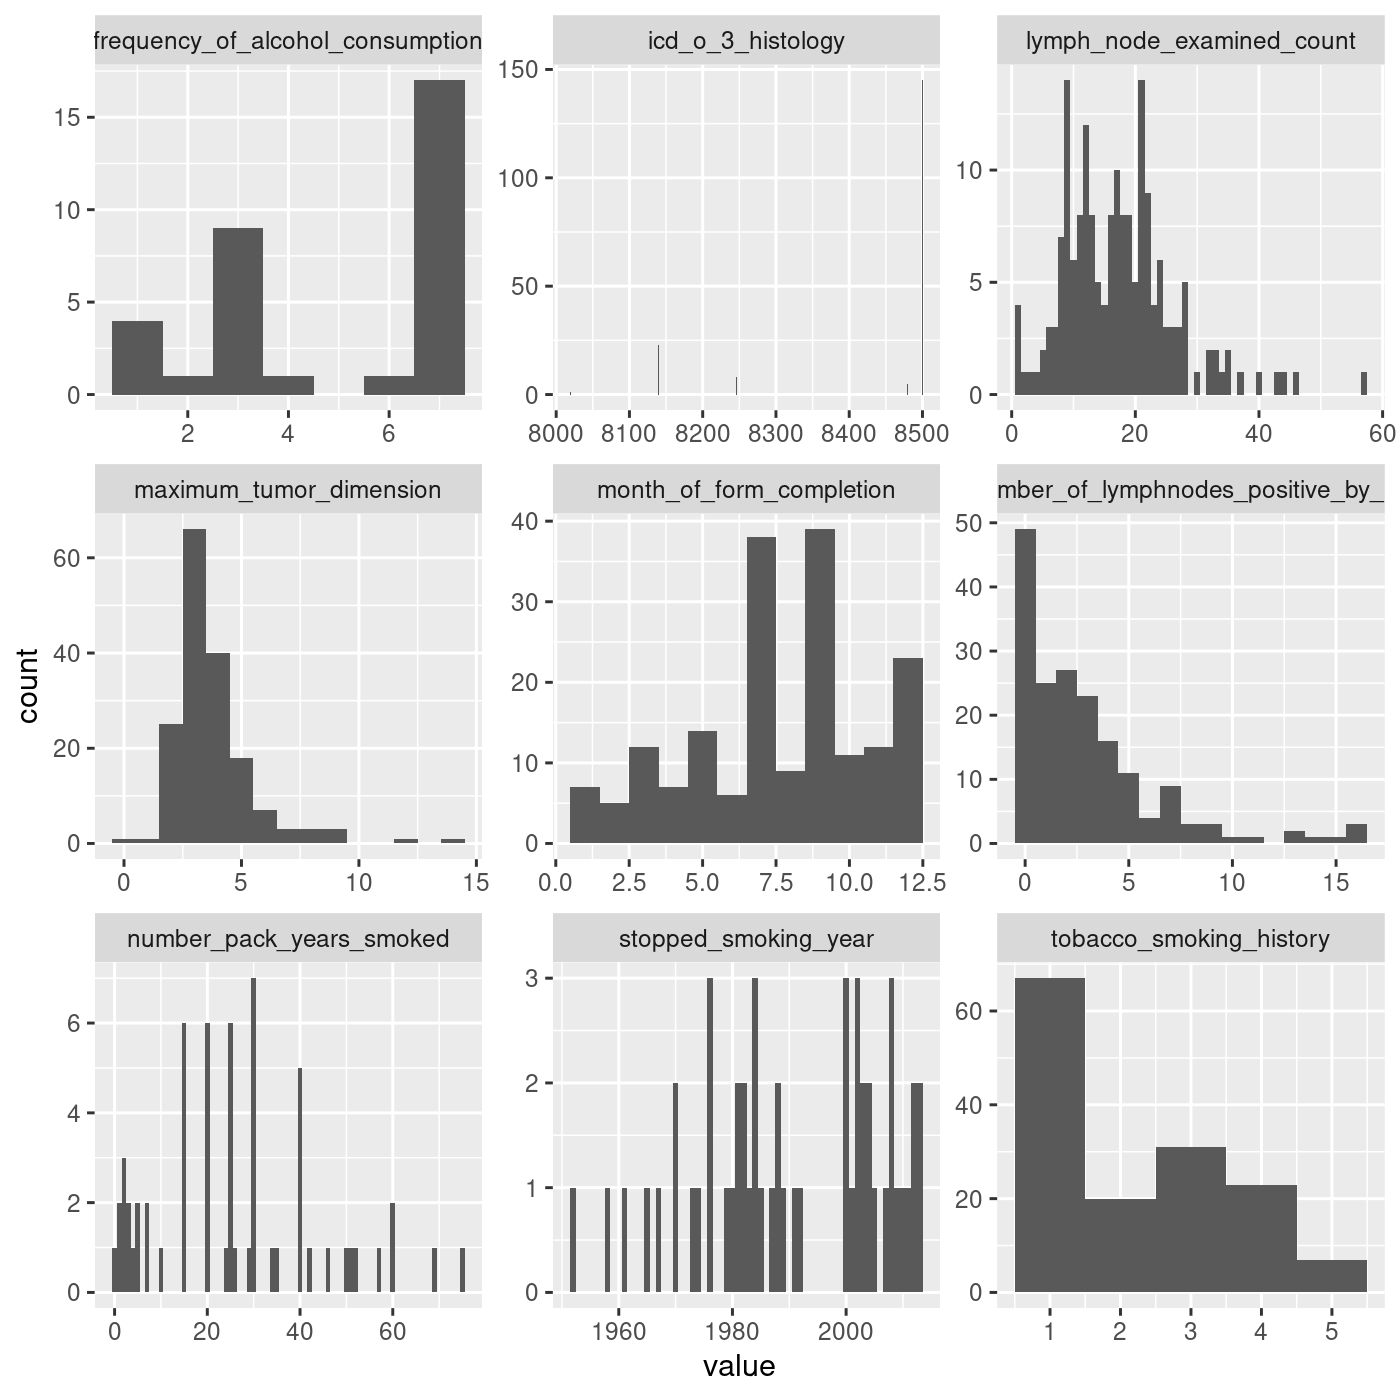

In [66]:
ggplot(gather(df_patient_num[,10:18], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

Warning message:
“Removed 136 rows containing non-finite values (stat_bin).”


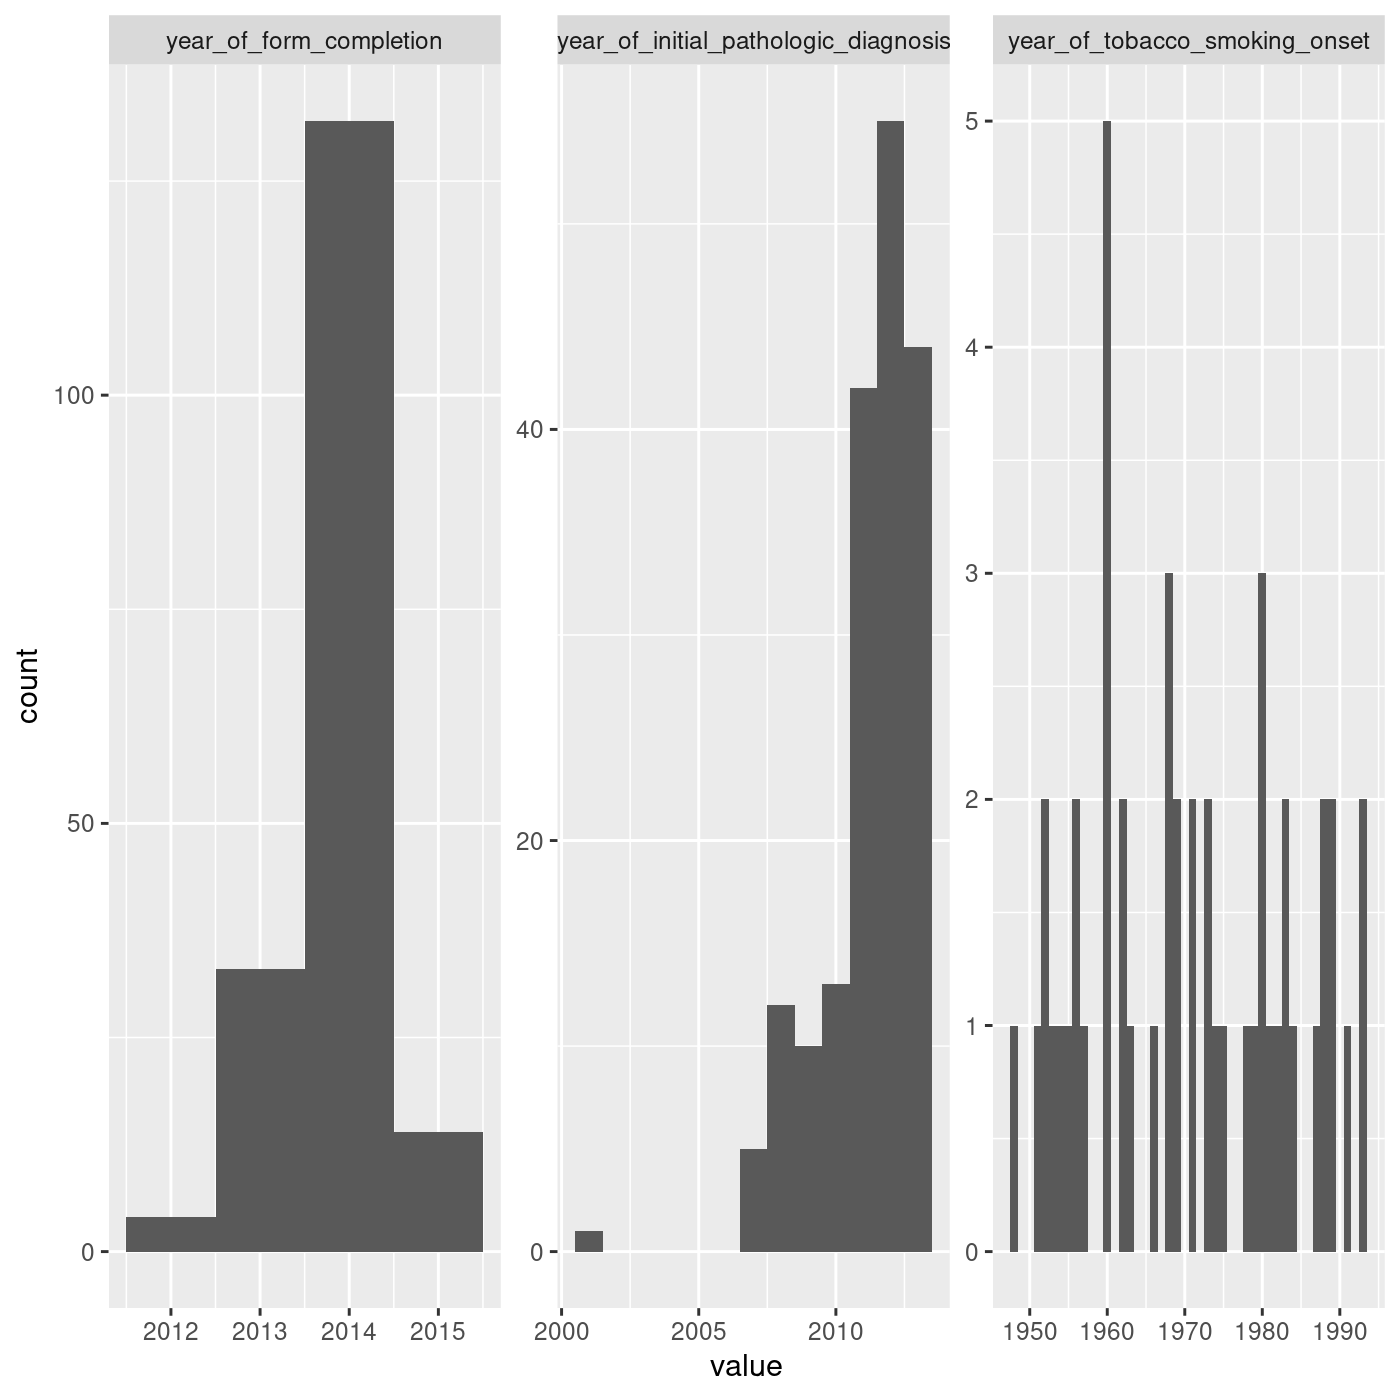

In [67]:
ggplot(gather(df_patient_num[,19:21], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 



## 
## Correlations - Pearson - Patients Data

In [75]:
#install.packages("Hmisc")
#library(Hmisc)

corrPatient <- rcorr(as.matrix(df_patient_num))

corrPatient_plot <- cor(as.matrix(df_patient_num), use="pairwise.complete.obs")

corrPatient_plot[is.na(corrPatient_plot)] <- 0

head(corrPatient_plot,5) # NA Values transformed to 0. For plotting purposes.

Warning message in sqrt(npair - 2):
“NaNs produced”


,mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_pancreatitis_onset,frequency_of_alcohol_consumption,⋯,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
mRNAseq_cluster,1.00000000,0.19566185,-0.2485859,-0.05302266,-0.22478938,-0.04774432,0.05181841,0.5368604,-0.02213471,-0.3373452,⋯,0.11125947,-0.14869485,0.02276224,0.13340154,-0.05610128,0.09769757,0.06950063,-0.11297992,0.04793358,0.127098028
days_to_death,0.19566185,1.00000000,0.0000000,-0.05798936,-0.33082062,-0.12529848,0.05706725,-0.7325000,-0.50087807,-0.3985462,⋯,-0.05078277,-0.08498309,0.05476262,-0.14506504,-0.03603833,0.16798827,0.17013852,0.05143176,-0.57039285,0.058129242
days_to_last_followup,-0.24858588,0.00000000,1.0000000,-0.27138071,0.01645460,0.26085024,0.26978703,-0.1022748,-0.26066382,0.3856639,⋯,0.10781905,0.08678551,0.29091122,-0.03707017,0.24780720,0.14299741,0.05108127,0.15500026,-0.71743794,-0.004843835
age_at_initial_pathologic_diagnosis,-0.05302266,-0.05798936,-0.2713807,1.00000000,-0.02386114,0.04946877,-0.99965938,-0.1354684,0.14982529,0.2274241,⋯,-0.11952082,0.05258912,-0.14660688,-0.03106103,-0.07286694,-0.51431132,-0.03124219,0.01208075,0.10443294,-0.712470516
amount_of_alcohol_consumption_per_day,-0.22478938,-0.33082062,0.0164546,-0.02386114,1.00000000,0.18573914,0.02553868,0.2970082,0.07869078,0.2978514,⋯,0.32325765,0.24967183,-0.01705986,0.26232743,0.27597172,-0.04660656,-0.08658153,0.08496278,-0.08622419,-0.335967310


In [142]:
which(apply(df_patient_num,2,sd)==0)

named integer(0)

In [106]:
dpn_na <- df_patient_num %>%  summarise_all(funs(sum(!is.na(.))))
t(dpn_na)

mRNAseq_cluster,178
days_to_death,95
days_to_last_followup,88
age_at_initial_pathologic_diagnosis,183
amount_of_alcohol_consumption_per_day,32
day_of_form_completion,183
days_to_birth,183
days_to_diabetes_onset,14
days_to_pancreatitis_onset,11
frequency_of_alcohol_consumption,33
icd_o_3_histology,183


In [ ]:
#complete.cases(dfm)
#dfm

In [70]:
# This function returns a Table with Rownames, Colnames, Correlation Coefficient, p-value
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

### Table of correlations

In [71]:
# Visualize Correlation - Table

dffc <- flattenCorrMatrix(corrPatient$r, corrPatient$P)
dffc

row,column,cor,p
<fct>,<fct>,<dbl>,<dbl>
mRNAseq_cluster,days_to_death,0.19566185,0.06016458
mRNAseq_cluster,days_to_last_followup,-0.24858588,0.02178754
days_to_death,days_to_last_followup,NA,NA
mRNAseq_cluster,age_at_initial_pathologic_diagnosis,-0.05302266,0.48210479
days_to_death,age_at_initial_pathologic_diagnosis,-0.05798936,0.57670918
days_to_last_followup,age_at_initial_pathologic_diagnosis,-0.27138071,0.01054076
mRNAseq_cluster,amount_of_alcohol_consumption_per_day,-0.22478938,0.22407038
days_to_death,amount_of_alcohol_consumption_per_day,-0.33082062,0.17994780
days_to_last_followup,amount_of_alcohol_consumption_per_day,0.01645460,0.95547697


### Plot

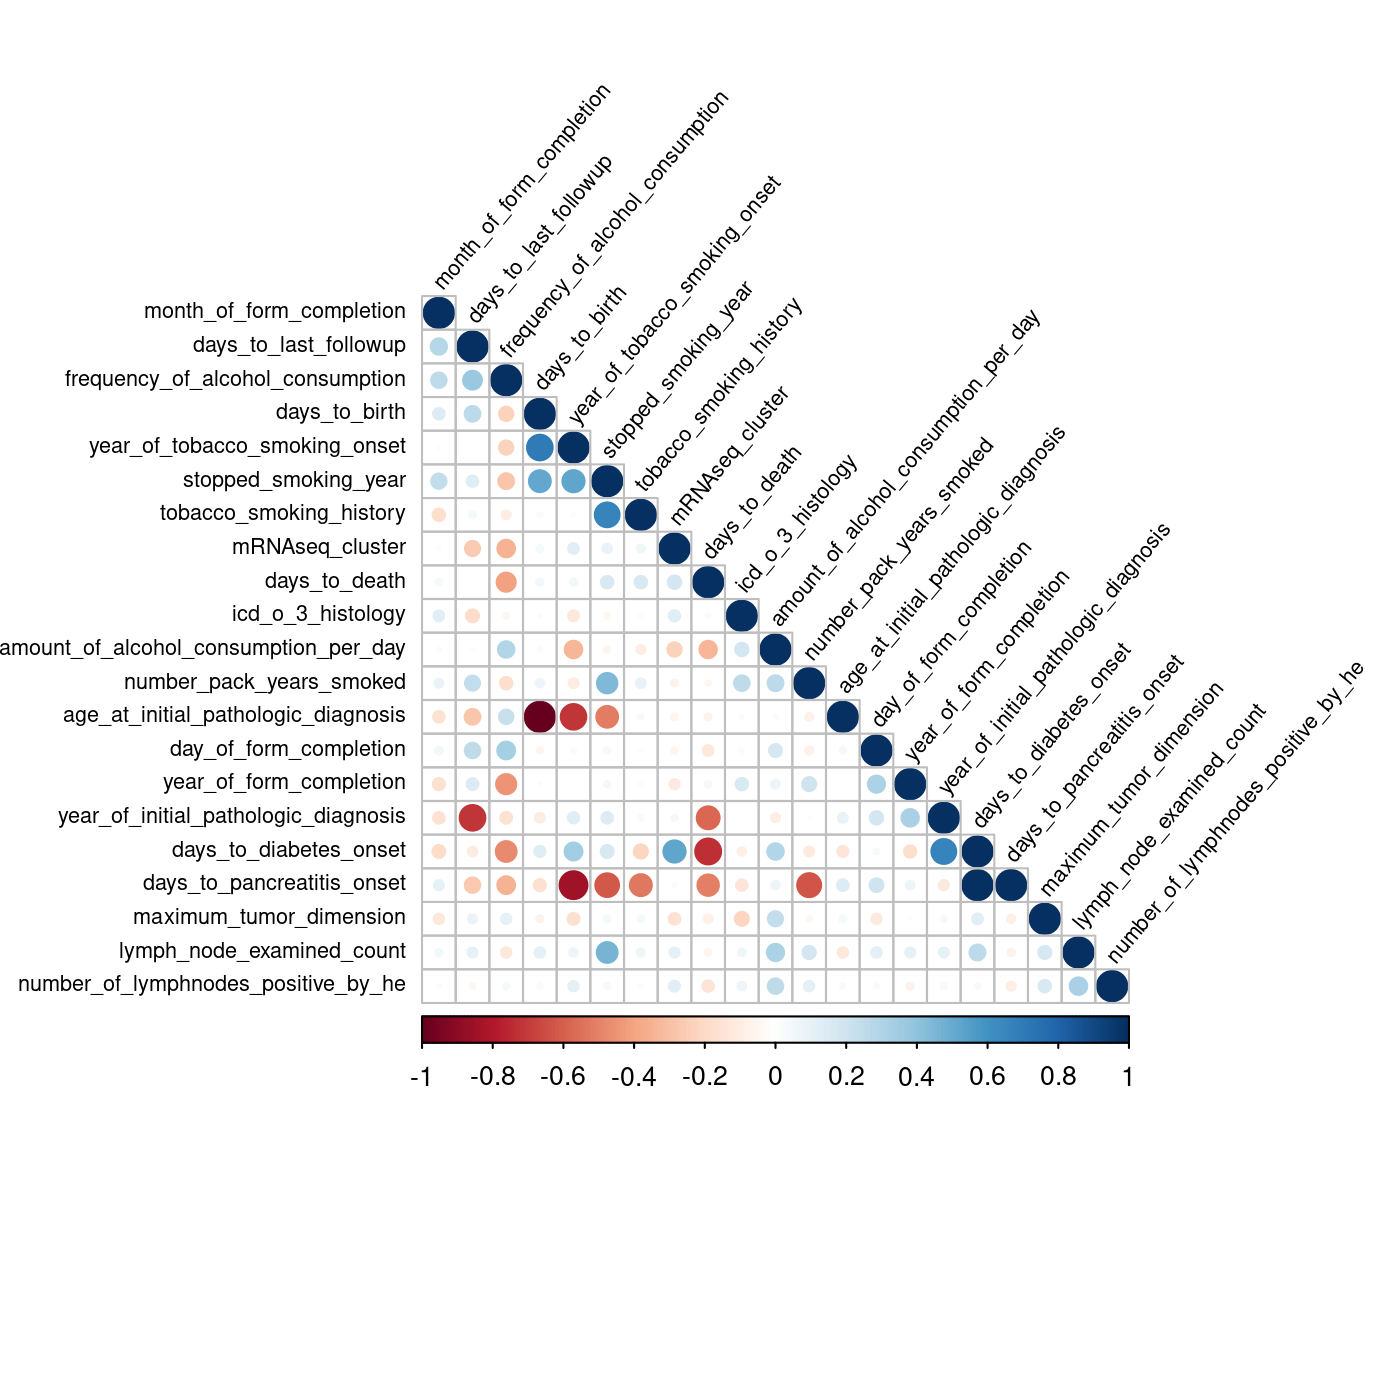

In [72]:
# WAY 1:
#heatmap(corrPatient)


# WAY 2:
#install.packages("corrplot")
#library(corrplot)

options(jupyter.plot_scale=1, repr.plot.res = 200)
#options(repr.plot.width = 30, repr.plot.height = 30.75, repr.plot.res = 100)

corrplot(corrPatient_plot, type = "lower", order = "hclust", 
         tl.col = "black", tl.srt = 50, tl.cex=0.65)

### Detailed correlation analysis
For a more detailed anaylsis we seperate the dataset into those patient who are still alive and those who are deceased.
Some variables make only sense for these subgroups such as days_to_last_followup and days_to_death which are mutually exclusive

We further remove the variables days_to_pancreatitis_onset and days_to_diabetes_onset because there are too many NaN in these variables


In [132]:
df_patient_relevant <- t_patient_data %>% select(-day_of_dcc_upload, -month_of_dcc_upload, -year_of_dcc_upload, -days_to_index, -days_to_initial_pathologic_diagnosis, -number_of_lymphnodes_positive_by_ihc,-system_version)


# not enough non NaN in these two variables
df_patient_relevant <- df_patient_relevant %>% select(-days_to_diabetes_onset, -days_to_pancreatitis_onset)

df_patient_dead <-  df_patient_relevant %>% filter(vital_status == 'dead') %>% select_if(is.numeric) %>% select(-days_to_last_followup)
head(df_patient_dead)

df_patient_alive <-  df_patient_relevant %>% filter(vital_status == 'alive') %>% select_if(is.numeric) %>% select(-days_to_death)
head(df_patient_alive)

mRNAseq_cluster,days_to_death,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,frequency_of_alcohol_consumption,icd_o_3_histology,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,66,65,1,5,-23962,3,8480,22,4.5,7,7,25.0,1988,3,2014,2012,1962
3,293,75,NA,5,-27600,NA,8500,18,5.0,7,0,NA,NA,NA,2014,2012,NA
4,627,70,1,5,-25920,3,8500,37,4.0,8,6,NA,NA,1,2014,2012,NA
3,607,55,NA,16,-20133,NA,8500,22,4.3,7,2,51.0,NA,5,2014,2012,NA
2,691,73,1,16,-26936,3,8500,18,3.2,7,4,7.5,1965,3,2014,2012,1960
3,277,56,1,5,-20641,7,8500,28,3.3,7,2,NA,NA,1,2014,2012,NA


mRNAseq_cluster,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_form_completion,days_to_birth,frequency_of_alcohol_consumption,icd_o_3_histology,lymph_node_examined_count,maximum_tumor_dimension,month_of_form_completion,number_of_lymphnodes_positive_by_he,number_pack_years_smoked,stopped_smoking_year,tobacco_smoking_history,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
2,729,48,NA,16,-17794,NA,8140,34,6.8,7,0,NA,NA,5,2014,2012,NA
1,80,71,NA,16,-26028,NA,8500,27,3.5,7,3,NA,NA,NA,2014,2012,NA
3,676,73,1,16,-26943,3.0,8500,24,5.8,7,0,2.2,1970,3,2014,2012,1960
2,1287,61,NA,15,-22425,NA,8140,8,2.2,9,0,NA,NA,1,2014,2011,NA
3,969,55,1,16,-20316,0.5,8140,19,3.5,7,0,42.0,2004,4,2014,2011,1973
2,484,71,NA,16,-26188,NA,8500,19,2.8,7,2,NA,NA,NA,2014,2012,NA


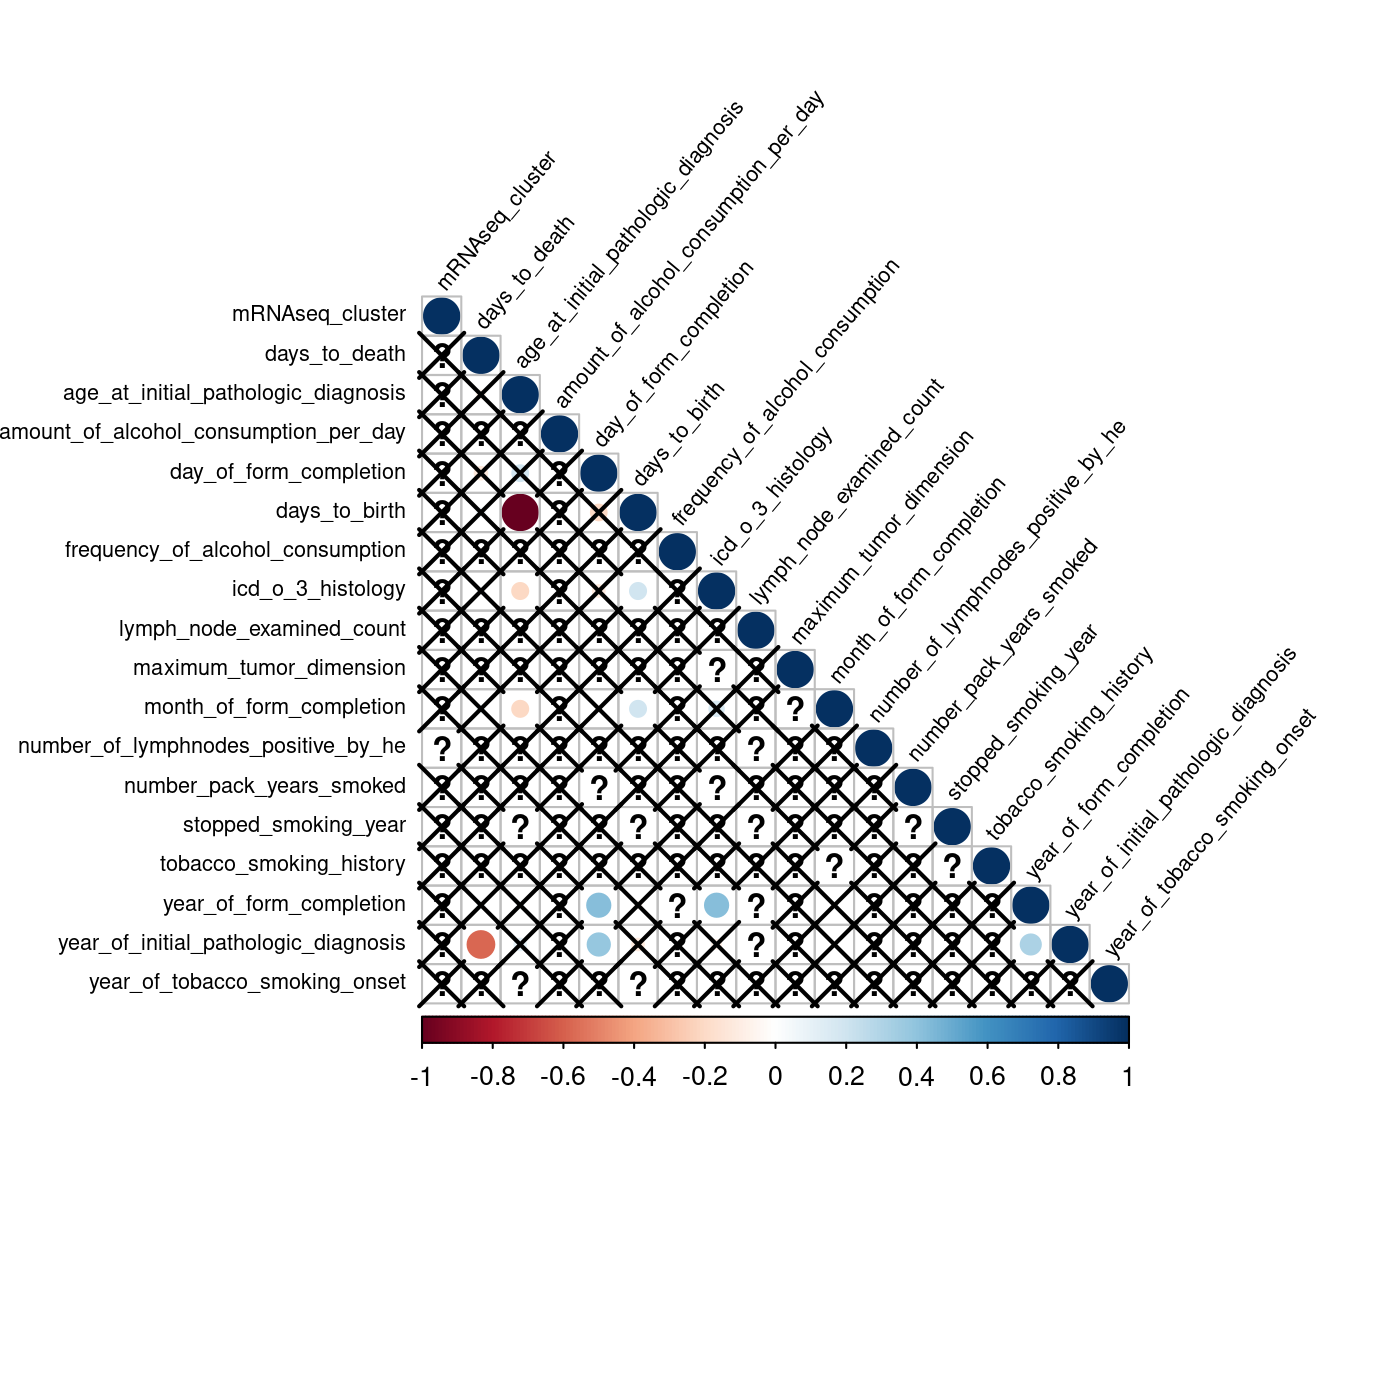

In [140]:
cor_dead <- cor.mtest(df_patient_dead, conf.level = 0.95)
M <- cor(df_patient_dead)
corrplot(M, type = "lower", 
         tl.col = "black", tl.srt = 50, tl.cex=0.65, p.mat = cor_dead$p, sig.level = .05)


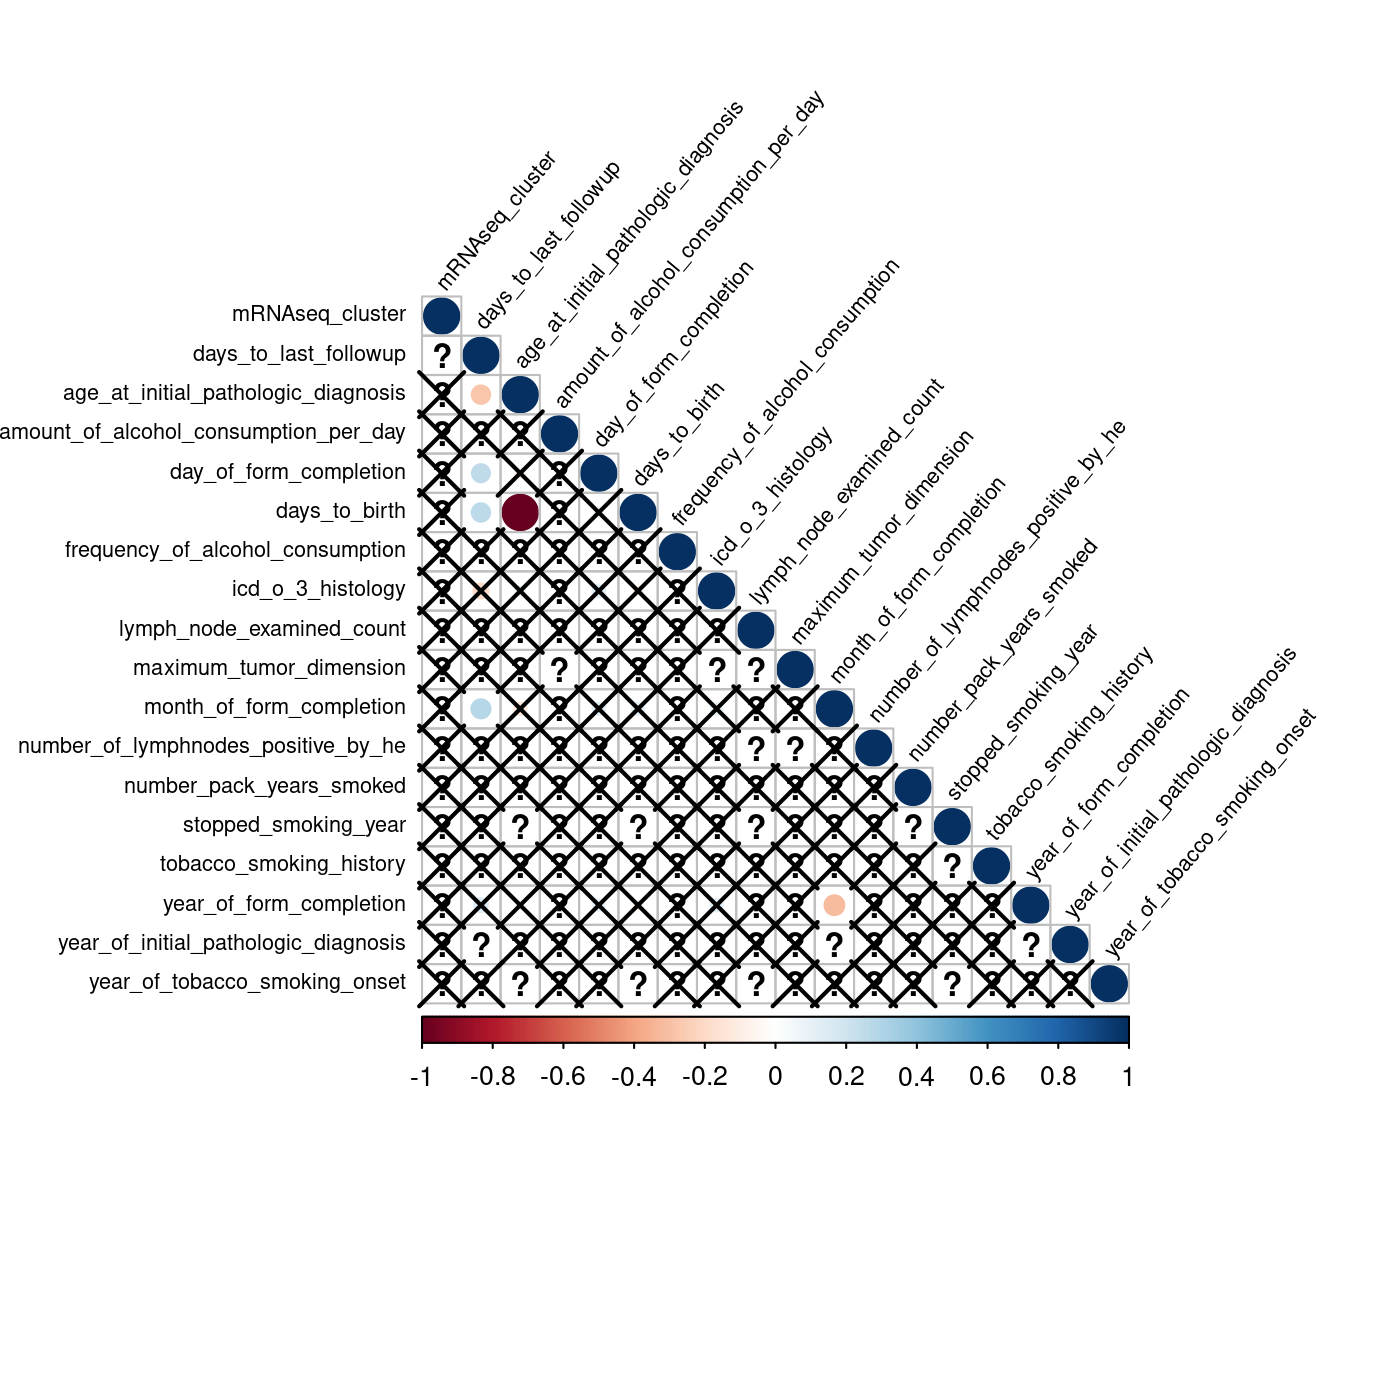

In [141]:
cor_alive <- cor.mtest(df_patient_alive, conf.level = 0.95)
M <- cor(df_patient_alive)
corrplot(M, type = "lower", 
         tl.col = "black", tl.srt = 50, tl.cex=0.65, p.mat = cor_alive$p, sig.level = .05)

After controlling for non significant correlation, the only significant relations seems to be
positive for icd_o_3_histology and days_to_birth
negative for age_at_initial_pathologic_diagnosis and days_to_birth

#### The most correlated features in the Patient Dataset seem to be ...

## Correlation - Pearson - Expression Dataset

In [ ]:
# Perform PEARSON correlation
corrExpression <- rcorr(as.matrix(t_expression_data))

# Transform Data for easy plotting
corrExpression_plot[is.na(corrPatient_plot)] <- 0
head(corrExpression_plot,5)

### Table of correlations

In [ ]:
# Provide a Table of correlations with p-values
dffcE <- flattenCorrMatrix(corrExpression$r, corrExpression$P)
dffcE %>% filter(dffcE[4] >= 0.7 | dffcE[4] <= -0.7)

### Plot

In [ ]:
# WAY 1 / WAY 2 / WAY 3 ???

# I would use only the most correlated ones from the previous table.

#### The most correlated features in the Expression Dataset seem to be ...


### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Clustering Analysis

## References

#### 01 - Baek, B., Lee, H. Prediction of survival and recurrence in patients with pancreatic cancer by integrating multi-omics data. Sci Rep 10, 18951 (2020). https://doi.org/10.1038/s41598-020-76025-1